# Tarea 5

## Ejercicio 0

In [605]:
using Plots

In [606]:
f(x,c)=x^2+c

f (generic function with 1 method)

In [607]:
f2(x,c)=f(f(x,c),c)

f2 (generic function with 1 method)

El exponente de Lyapunov $\lambda$  nos dice qué tan rápido dos puntos muy cercanos se acercan o se alejan después de $n$ iteraciones. Si $D_0$ es la distancia inicial, entonces $D_t\sim e^{\lambda t}D_0$, donde $D_t$ es la separación al tiempo t.
Formalmente, $e^{\lambda n} =lim_{n\to\infty}lim_{D_0\to0} \frac{D_n}{D_0}$  de donde podemos despejar $\lambda =lim_{n\to\infty}lim_{D_0\to0}\frac{1}{t}ln( \frac{D_0}{D_n} )$ Si $x_0$ es un punto atractor, entonces $\lambda =\frac{1}{t}ln(lim_{n\to\infty}lim_{x->x_0}(\frac{f^n(x)-f^n(x_0)}{x-x_0} ))$, pero  $lim_{x->x_0}(\frac{f^n(x)-f^n(x_0)}{x-x_0})=(f^n)'(x_0)$, y $(f^n)'(x_0)=\Pi_{i=0}^{n-1}f'(f^i(x_0))$, de donde$\lambda=lim_{n\to\infty}\frac{1}{n}(\Sigma_{i=0}^{n-1}ln(f'(f^i(x_0)))$


In [609]:
C=[]
X=[]
for c in -2:0.0001:1/4
    x=0.1
    y=0
    for i in 1:10000
        x=f(x,c)
        y=y+log(abs(2*x))
    end
    push!(X,((1/10001)*y))
    push!(C,c)
end
        


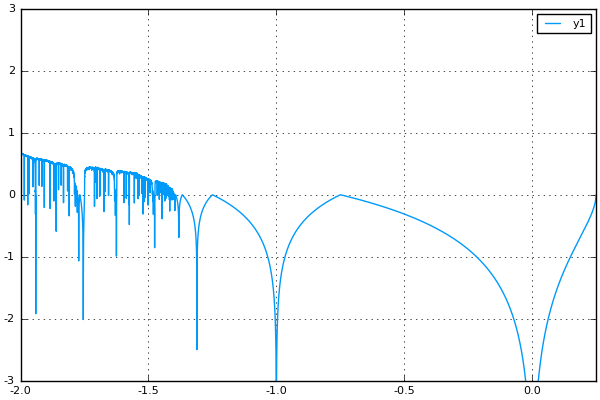

In [610]:
plot(C,X)
ylims!(-3,3)

Podemos ver en la gráfica que cuando $c$ es un punto de bifurcación, el exponente de Lyapunov se vuelve $0$. Es decir, en el límite los puntos muy cercanos al punto atractor se quedan a la misma distancia de éste. Esto pasa porque los puntos de bifurcación son aquéllos donde la gráfica de alguna iteración es tangente a la línea de la identidad, así que si $x$ es muuy cercano a $x_0$-un punto atractor-, entonces $f^n(x)=x$, por lo que da distancia inicial se queda igual aunque se itere la función. Esto tiene sentido ya que si $\lambda=0$, entonces $e^{\lambda }t=e^0=1$, por lo que $D_t\sim D_0$


Cuando el $0$ es parte de un ciclo superestable, el exponente se va a $-\infty$, lo cual pasa porque $log(0)=-\infty$ (técnicamente). Esto quiere decir que los puntos muy cercanos a un ciclo atractor que contiene al $0$ se acercan infinítamente rápido a éste, ya que $lim_{t\to-\infty}e^t=0$, por lo de si un punto está muy cerca de $x_0$, entonces la distancia después de un tiempo $t$ es prácticamente $0$  ($D_t\sim 0$). 
Esto pasa porque en cualquier iteración de la función, el cero tiene derivada cero. Si además es tangente a la identidad entonces se acerca muy rápido al $0$.


## Ejercicio 1

Encontraremos los puntos donde $x=0$ es parte de un ciclo atractor de periodo $2^n$, ya que esta información nos da las constantes de Feigenbaum. En la pregunta anterior vimos que cuando pasa esto, el exponente de Lyapunov se va a $-\infty$ que para la computadora es NaN. Así, el problema se reduce a aproximar los puntos donde $\lambda$ es un mínimo local.

In [611]:
-2+(0.0001*10000)

-1.0

In [612]:
X[10001]

-Inf

In [613]:
-Inf<3

true

In [614]:
F1=[]
for i in 5000:(length(X)-1)
    if X[i-1]>X[i] && X[i+1]>X[i]
        push!(F1,-2+((i-1)*0.0001))
    end
end

In [615]:
F1

251-element Array{Any,1}:
 -1.5001
 -1.4995
 -1.4993
 -1.499 
 -1.4984
 -1.4981
 -1.4978
 -1.4975
 -1.4972
 -1.4969
 -1.4965
 -1.4961
 -1.4957
  ⋮     
 -1.4033
 -1.4028
 -1.4023
 -1.4019
 -1.4016
 -1.401 
 -1.4003
 -1.3969
 -1.3815
 -1.3107
 -1.0   
  0.0   

In [616]:
F2=[]
for C in F1
    X2=[]
    for c in C-0.0001:0.00001:C+0.0001
        x=0.1
        y=0
        for i in 1:20000
            x=f(x,c)
            y=y+log(abs(2*x))
        end
        push!(X2,y)
    end
    for i in 2:(length(X2)-1)
        if X2[i-1]>X2[i] && X2[i+1]>X2[i]
            push!(F2,C-0.0001+((i-1)*0.00001))
        end
    end
end

    

In [617]:
F2

1362-element Array{Any,1}:
 -1.50018
 -1.50015
 -1.50013
 -1.5001 
 -1.50006
 -1.50004
 -1.49959
 -1.49957
 -1.49954
 -1.49952
 -1.4995 
 -1.49947
 -1.49944
  ⋮      
 -1.40183
 -1.40168
 -1.40165
 -1.40161
 -1.40152
 -1.40096
 -1.40025
 -1.39695
 -1.38155
 -1.3107 
 -1.0    
  0.0    

In [618]:
F3=[]
for C in F2[1350:1362]
    X2=[]
    for c in C-0.00001:0.0000001:C+0.00001
        x=0.1
        y=0
        for i in 1:20000
            x=f(x,c)
            y=y+log(abs(2*x))
        end
        push!(X2,y)
    end
    for i in 2:(length(X2)-1)
        if X2[i-1]>X2[i] && X2[i+1]>X2[i]
            push!(F3,C-0.00001+((i-1)*0.0000001))
        end
    end
end



In [619]:
F3

320-element Array{Any,1}:
 -1.40188    
 -1.40184    
 -1.40184    
 -1.40184    
 -1.40184    
 -1.40184    
 -1.40184    
 -1.40184    
 -1.40184    
 -1.40184    
 -1.40184    
 -1.40184    
 -1.40184    
  ⋮          
 -1.40151    
 -1.40151    
 -1.40151    
 -1.40151    
 -1.40151    
 -1.40096    
 -1.40025    
 -1.39695    
 -1.38155    
 -1.3107     
 -1.0        
 -1.69407e-21

In [620]:
F5=F3[310:320]

11-element Array{Any,1}:
 -1.40151    
 -1.40151    
 -1.40151    
 -1.40151    
 -1.40096    
 -1.40025    
 -1.39695    
 -1.38155    
 -1.3107     
 -1.0        
 -1.69407e-21

In [621]:
F4=[]
for i in 0:length(F5)-1
    push!(F4,F5[11-i])
end

In [622]:
Feigenbaum=[]
for i in 1:9
    g=(F4[i]-F4[i+1])/(F4[i+1]-F4[i+2])
    push!(Feigenbaum,g)
end

LoadError: LoadError: invalid redefinition of constant g
while loading In[622], in expression starting on line 2

In [623]:
Feigenbaum

0-element Array{Any,1}

Sabemos que la primera contante de Feigenbaum es $\sim 4.669201 $, así que la aproximación que obtuvimos utilizando $\frac{C_4-C_5}{C_5-C_6}$ es bastante buena. Después de esa aproximación ya no son nada buenas las demás, ya que hay ciclos súperestables demasiado seguido y nuestro refinamiento no fue tan fino. 

Calcularemos la segunda constante de Feigenbaum usando sólo las primeras 6 C's. 


In [624]:
A=[-1,2,3]
abs(A)

3-element Array{Int64,1}:
 1
 2
 3

In [625]:
F4

11-element Array{Any,1}:
 -1.69407e-21
 -1.0        
 -1.3107     
 -1.38155    
 -1.39695    
 -1.40025    
 -1.40096    
 -1.40151    
 -1.40151    
 -1.40151    
 -1.40151    

In [626]:
D=[]
for i in 2:7
    x=0
    X=[f(x,F4[i])]
    for j in 1:(2^(i-1)-2)
        x=f(x,F4[i])
        push!(X,x)
    end
    M=abs(X)
    d=minimum(M)
    push!(D,d)
end        

In [627]:
Feigenbaum2=[]
for i in 1:length(D)-1
    push!(Feigenbaum2,D[i]/D[i+1])
end

In [628]:
Feigenbaum2

5-element Array{Any,1}:
 2.45556
 2.49189
 2.50025
 2.5023 
 2.50263

Sabemos que la segunda constante de Feigenbaum es $\sim2.502907$, así que nuestra última aproximación es buena.

## Ejercicio 3


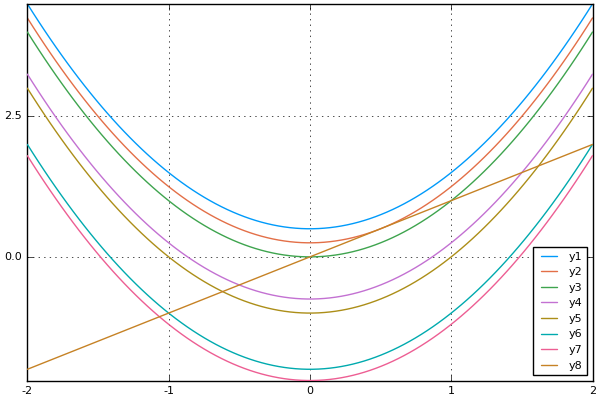

In [629]:
plot(x->f(x,1/2),-2,2)
plot!(x->f(x,1/4),-2,2)
plot!(x->f(x,0),-2,2)
plot!(x->f(x,-3/4),-2,2)
plot!(x->f(x,-1),-2,2)
plot!(x->f(x,-2),-2,2)
plot!(x->f(x,-2.2),-2,2)
plot!(x->x,-2,2)

Podemos ver que para $c>\frac{1}{4}$, $Q_c$ no tiene ningún punto fijo. En $c=1/4$ hay exactamente un punto fijo y para $c<\frac{1}{4}$ hay dos puntos fijos: uno atractor y uno repulsor. Así, $c=\frac{1}{4}$ es el primer punto de bifurcación. Podemos ver también que la derivada en ese punto es $1$. También podemos ver que el la derivada del punto fijo atractor va creciendo mientras disminuye $c$; por lo que eventualmente este punto va a tener derivada $|1|$ y después, para $c's$ aún menores, derivada con valor absoluto mayor a $1$. Entonces, el punto fijo va a dejar de ser atractor y va a desaparecer del diagrama de bifurcación. 


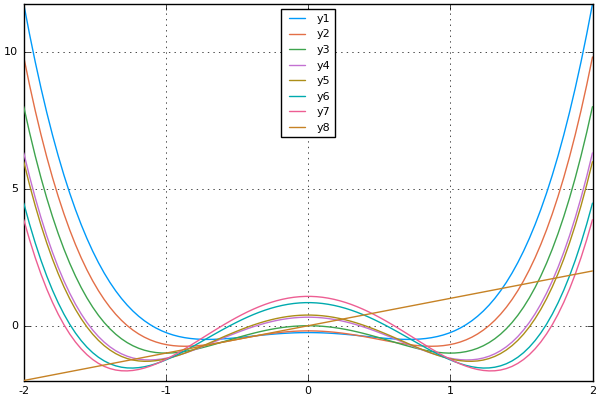

In [630]:
plot(x->f2(x,-2/4),-2,2)
plot!(x->f2(x,-3/4),-2,2)
plot!(x->f2(x,-1),-2,2)
plot!(x->f2(x,-5/4),-2,2)
plot!(x->f2(x,-1.3),-2,2)
plot!(x->f2(x,-1.546),-2,2)
plot!(x->f2(x,-1.65),-2,2)
plot!(x->x,-2,2)

En las gráficas de $Q^2_c$ para distintas $c$, podemos ver el segundo punto de bifurcación, es decir, cuando el punto atractor se vuelve de periodo dos. Para $c>-\frac{3}{4}$, hay dos puntos fijos de la iteración, que corresponden a los puntos fijos de periodo uno. En $c=-\frac{3}{4}$, hay un nuevo punto fijo de la iteración, y es donde se da la segunda bifurcación: ahora, para $c<\frac{1}{4}$, hay cuatro puntos fijos para la iteración. Dos son de periodo uno- ambos repulsores- y los dos nuevos son atractores de periodo 2. Éstos forman el ciclo 2-periódico atractor. 

## Ejercicio 4

In [631]:
c=2.2

2.2

Buscamos $p>0$ tal que $p^2+c=p$, i.e. $p=\frac{1+\sqrt{1+4c}}{2}$

In [632]:
p=(1+sqrt(1+(4*c)))/2

2.0652475842498528

In [633]:
f(p,-2.2)

2.0652475842498523

In [634]:
Y=[]
X=[]
for i in -p:0.0001:p
    x=i
    for j in 1:1000
        x=f(x,-2.22)
    end
    push!(Y,x)
    push!(X,i)
end

In [635]:
Y

41305-element Array{Any,1}:
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
   ⋮
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf

Podemos ver que todos los puntos en el intervalo $[-p,p]$ se van a infinito después de algunas iteraciones. Lo que estudiaremos es qué tan rápido se escapan del intervalo. La siguiente función determina después de cuántas iteraciones se escapa un punto en el intervalo, y los separa en sub-intervalos segúnsea el caso. El primer "intervalo" de la lista J será el de los puntos que se escapan en una iteración, el segundo el que se escapan en dos, y así sucesivamente. 

In [636]:
J=[]
for i in 0:20
    push!(J,[])
end
for i in -p:0.001:p
    x=i
    x=f(x,-2.2)
    contador=1
    while (x>=-p && x<=p && contador <21)
        x=f(x,-2.2)
        contador += 1
    end
    if contador<20
        for m in 1:contador
        push!(J[contador],i)
        end
    end
end 

In [637]:
X=[]
for x in -p:0.001:p
    push!(X,x)
end  

In [638]:
function F(x,X,n)
    if (x in X)
        y=n
    else
        y=0
    end
    return y
end

F (generic function with 1 method)

In [639]:
Y=[[],[],[],[],[],[],[]]
for i in 1:7
    for x in X
        push!(Y[i],F(x,J[i],i))
    end
end

In [640]:
size(X)==size(Y[1])

true


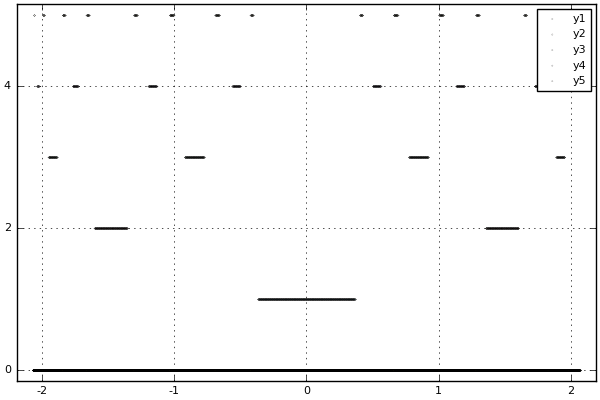

In [641]:
scatter(X,Y[1],markersize=0.1)
scatter!(X,Y[2],markersize=0.1)
scatter!(X,Y[3],markersize=0.1)
scatter!(X,Y[4],markersize=0.1)
scatter!(X,Y[5],markersize=0.1)




De abajo hacia arriba, vemos lo siguiente: El primer intervalo es el de los puntos que se escapan en una iteración. Después, los dos intervalos de arriba son puntos que se escapan en dos iteraciones. Esto es porque después de una iteración van a dar al de abajo, que se escapa en una. Así sucesivamente. 
Los puntos que están en la unión de estos conjuntos son, entonces, los que se escapan eventualmente del intervalo. El complemento de esa unión infinita son los puntos cuya órbita está acotada y es además el conjunto de Cantor. 

## Ejercicio 5

Lo primero que tenemos que hacer es encontrar aproximadamente los $c's$ para los que hay una ventana de periodo tres. Para esto, dibujaremos el diagrama de bifurcaciones de la familia cuadrática.

In [642]:
f(0.1,1/4)

0.26

In [643]:
f(0.51,1/2)

0.7601

In [644]:
X=[]
Atractores=[]
C=[]
for c in -2:0.0001:1/4
    push!(X,[])
    x=0.1
    for m in 0:10000
        x=f(x,c)
    end
    push!(Atractores,x)
    push!(C,c)
    contador2=0
    while abs(x-f(x,c))>0.001 && contador2<150
        x=f(x,c)
        push!(Atractores,x)
        push!(C,c)
        contador2+=1
        push!(X,x)
    end
end
    


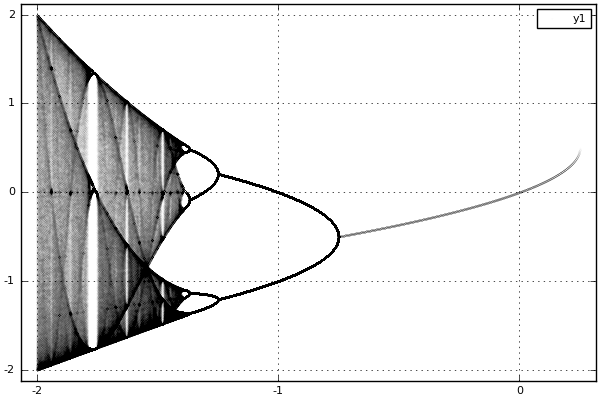

In [645]:
scatter(C,Atractores,markersize=0.005)

In [646]:
X=[]
Atractores2=[]
C2=[]
for c in -1.82:0.00001:-1.73
    push!(X,[])
    x=0.1
    for m in 0:10000
        x=f(x,c)
    end
    push!(Atractores2,x)
    push!(C2,c)
    contador2=0
    while abs(x-f(x,c))>0.001 && contador2<150
        x=f(x,c)
        push!(Atractores2,x)
        push!(C2,c)
        contador2+=1
        push!(X,x)
    end
end
    


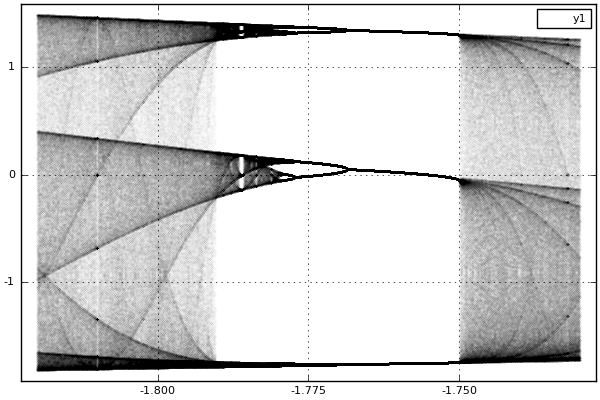

In [647]:
scatter(C2,Atractores2,markersize=0.01)

En el diagrama de bifurcación podemos ver que es alrededor de $c=-1.76$  hay hay un ciclo atractor de periodo 3. Veamos cómo se ve la gráfica, $Q_c^3$

In [648]:
c=-1.760
d=c+0.1
e=c-0.10

-1.86


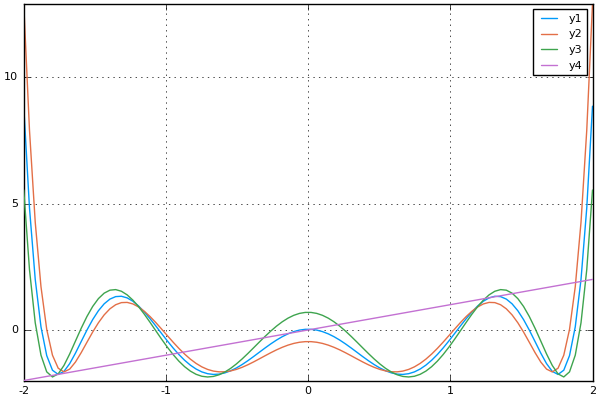

In [649]:
plot(x->f(f2(x,c),c),-2,2)
plot!(x->f(f2(x,d),d),-2,2)
plot!(x->f(f2(x,e),e),-2,2)
plot!(x->x,-2,2)

En la gráfica podemos ver que para un valor de $c$ que no está en la ventana de periodo tres, su terera iteración sólo toca a la identidad en dos puntos, que son los puntos fijos de periodo 1 repulsores. Para $c$ en la ventana de periodo tres, la tercera iteración toca a la identidad en ocho puntos, donde dos de ellos son los de periodo 1 y los demás son puntos fijos de periodo tres. Hay un valor de $c$ en donde la iteración tiene 6 puntos fijos, donde tres de ellos son tangentes a la identidad. Antes de este valor no hay ventana de periodo tres, y después sí. Por lo tanto, es una bifurcación *tangente*. 

In [650]:
x=0.1
y=0
for i in 1:10000
    x=f(x,c)
    y=y+log(abs(2*x))
end
print(x)

-1.7594320927983713

In [651]:
x=0.1
y=0
for i in 1:10000
    x=f(x,d)
    y=y+log(abs(2*x))
end
print(x)

-0.5714511232658377

El exponente de Lyapunov para $c$ en la ventana de periodo tres es de $-1.75$, mientras que para $c$ anterior a la ventana es de $-0.571$ Estom quiere decir que en ambos casos, los puntos cercanos se acercan uno al otro pero en la ventana de periodo 3 lo hacen más rápidamente. 

Para encontrar el valor de $c$ en la ventana de periodo tres donde se da el ciclo superestable, tomaremos primero una aproximación del diagrama de bifurcación, donde podemos ver que en $c=-1.755$, el diagrama de bifurcación parece tener un $0$. 

In [652]:
C=-1.755

-1.755

Aquí calculamos $c$ con más precisión...

In [653]:
L=[]
X=[]
for c in C-0.01:0.0001:C+0.01
    x=0.1
    y=0
    for i in 1:10000
        x=f(x,c)
        y=y+log(abs(2*x))
    end
    push!(X,((1/10001)*y))
    push!(L,c)
end
       


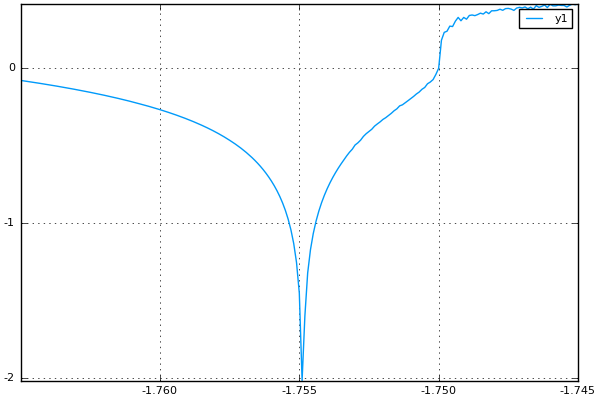

In [654]:
plot(L,X)

In [655]:
L=[]
X=[]
for c in -1.755:0.000001:-1.7545
    x=0.1
    y=0
    for i in 1:10000
        x=f(x,c)
        y=y+log(abs(2*x))
    end
    push!(X,((1/10001)*y))
    push!(L,c)
end
       


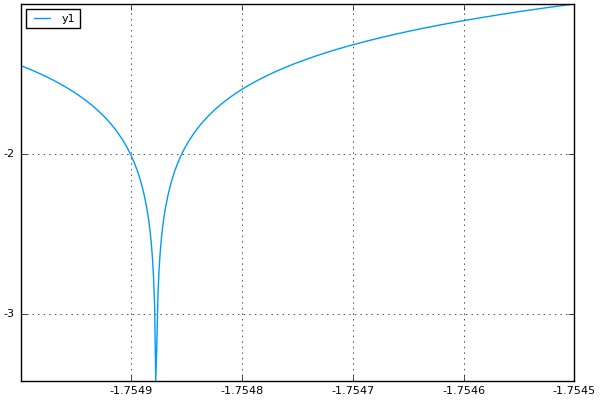

In [656]:
plot(L,X)

Podemos ver que, más precisamente, es alrededor de $c=-1.75486$ que se da un ciclo superestable. Ahora haremos un refinamiento alerededor de ese punto para obtener una aproximación más precisa. 

In [657]:
c=-1.75486

-1.75486

In [658]:
L=[]
X=[]
for c in -1.75488:0.0000001:-1.75487
    x=0.1
    y=0
    for i in 1:10000
        x=f(x,c)
        y=y+log(abs(2*x))
    end
    push!(X,((1/10001)*y))
    push!(L,c)
end
      


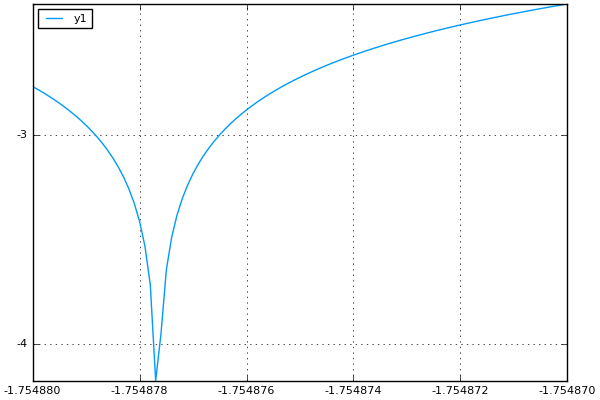

In [659]:
plot(L,X)

Ahora, sabemos que $c\in(-1.754878,-1.754876)$

In [660]:
L=[]
X=[]
for c in -1.754878:0.000000001:-1.754876
    x=0.1
    y=0
    for i in 1:10000
        x=f(x,c)
        y=y+log(abs(2*x))
    end
    push!(X,((1/10001)*y))
    push!(L,c)
end
      


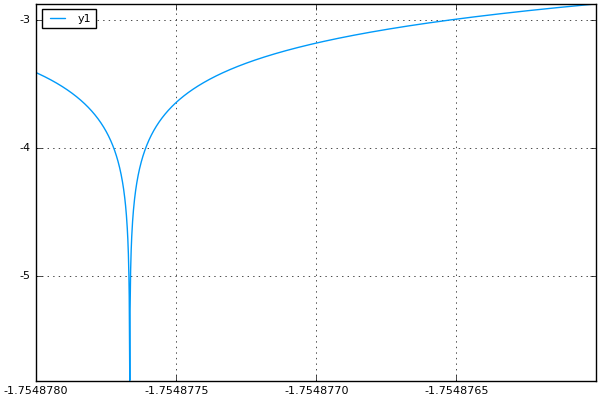

In [661]:
plot(L,X)

Nos quedaremos con la aproximación de $c\sim -1.7548772$

In [662]:
c=-1.7548772

-1.7548772


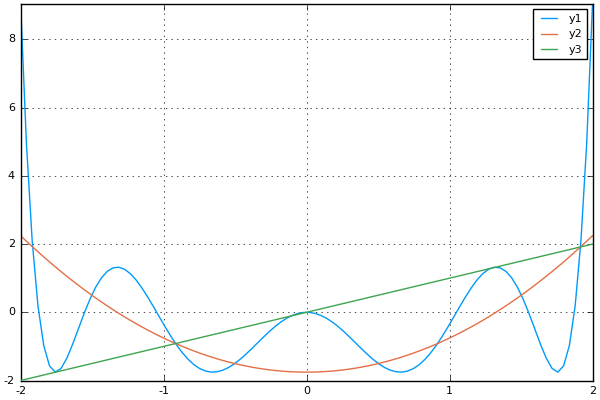

In [663]:
plot(x->f(f2(x,c),c),-2,2)
plot!(x->f(x,c),-2,2)
plot!(x->x,-2,2)

Aunque los tres puntos fijos que no son de periodo uno (que no intersecan a $Q_c$ parecen tangentes, sabemos que no lo son, ya que no hay una bifurcación en ese valor de $c$ sino un poco antes. Podemos ver eso acercándonos un poco más:


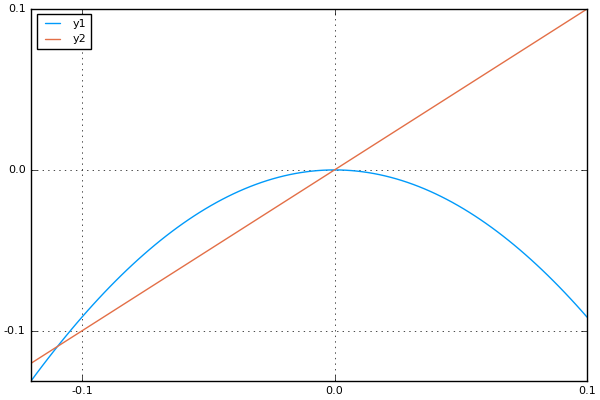

In [664]:
plot(x->f(f2(x,c),c),-0.12,0.1)
plot!(x->x,-0.12,0.1)


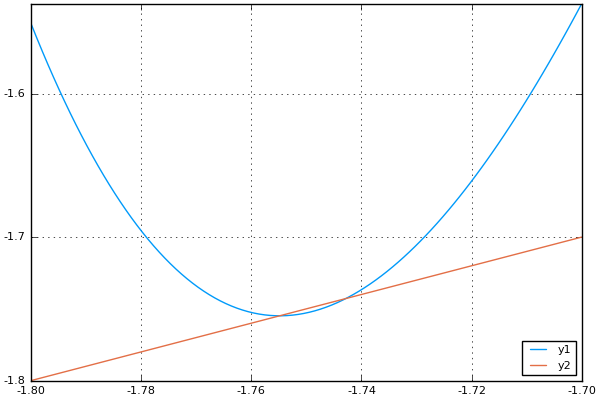

In [665]:
plot(x->f(f2(x,c),c),-1.8,-1.7)
plot!(x->x,-1.8,-1.7)


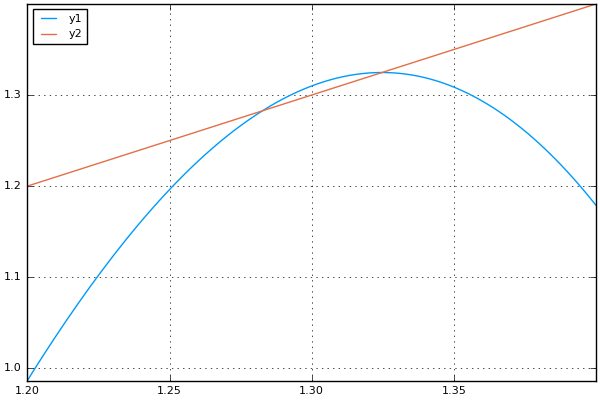

In [666]:
plot(x->f(f2(x,c),c),1.2,1.4)
plot!(x->x,1.2,1.4)

Así, gráficamente podemos constatar que hay 8 puntos fijos: 2 que son de periodo $1$ y otros 6 que son de periódo 3. Éstos cumplen que uno tiene derivada manor a 1 y el otro derivada 0. El conjunto de los tres puntos con derivada mayor a 1 es un ciclo de periodo 3, pero es inestable- es decir, si nos alejamos un poco de éste, ya no caemos en el ciclo periodico. El otro ciclo de periodo 3 es atractor.

In [667]:
X=[]
x=0.5
for i in 0:1000
    x=f(x,c)
    push!(X,x)
end

In [668]:
X

1001-element Array{Any,1}:
 -1.50488   
  0.509778  
 -1.495     
  0.480158  
 -1.52433   
  0.568691  
 -1.43147   
  0.294222  
 -1.66831   
  1.02838   
 -0.697307  
 -1.26864   
 -0.145428  
  ⋮         
 -2.63409e-6
 -1.75488   
  1.32472   
 -2.63409e-6
 -1.75488   
  1.32472   
 -2.63409e-6
 -1.75488   
  1.32472   
 -2.63409e-6
 -1.75488   
  1.32472   

Podemos ver que el ciclo de periodo tres atractor es $\{0,-1.75488,1.32472\}$
El otro ciclo de periodo 3 sabemos que existe porque vimos que hay otros tres puntos fijos, pero para encontraros lo único que podemos hacer es aproximar las intersecciones con la identidad, ya que iterando la función lo único que haremos es alejarnos de ellos. Usaremos el método de Newton con una aproximación inicial cercana. 

In [669]:
b=-1.742

-1.742

In [670]:
function Newton(f,g,x,iteraciones,c)
    for i in 1:iteraciones
        x=x-(f(x,c)/g(x,c))
    end
    return x
end

Newton (generic function with 2 methods)

In [671]:
f3(x,c)=f(f2(x,c),c)

f3 (generic function with 1 method)

In [672]:
f3r(x,c)=f3(x,c)-x

f3r (generic function with 1 method)

In [673]:
function g(x,c)
    y=1
    for i in 0:2
        y=y*(2*x)
        x=f(x,c)
    end
    return y
end
        

g (generic function with 2 methods)

In [674]:
gr(x,c)=g(x,c)-1

gr (generic function with 1 method)

In [675]:
gr

gr (generic function with 1 method)

In [676]:
c=-1.7548772

-1.7548772

In [677]:
C=Newton(f3r,gr,b,20,c)

-1.7428546436691394

Entonces, $\gamma=-1.74285...$

In [678]:
b=-0.1

-0.1

In [679]:
B=Newton(f3r,gr,b,20,c)

-0.10964741825898341

$\beta=-1.10964...$

In [680]:
b=1.28

1.28

In [681]:
A=Newton(f3r,gr,b,10,c)

1.282665108959083

...y $\alpha=1.282665...$

Podemos constatar que $Q_c(\alpha)=\beta, Q_c(\beta)=\gamma, Q_c(\gamma)=\alpha$

In [682]:
f(A,c)

-0.1096474182589835

In [683]:
B

-0.10964741825898341

In [684]:
f(B,c)

-1.7428546436691394

In [685]:
C

-1.7428546436691394

In [686]:
f(C,c)

1.282665108959083

In [687]:
A

1.282665108959083

Encontraremos ahora los valores $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$ Claramente, $\alpha,\beta,\gamma$ cumplen estas condidiones. Sin embargo, también lo hacen otros puntos cercanos a ellos. 

En el caso de $\beta$, podemos observar en la siguiente gráfica que hay un punto cercano a $1.1$ que cumple esa condición. Lo encontraremos usando el método de Newton pero para $f(x)=Q_c^3(x)-\beta$


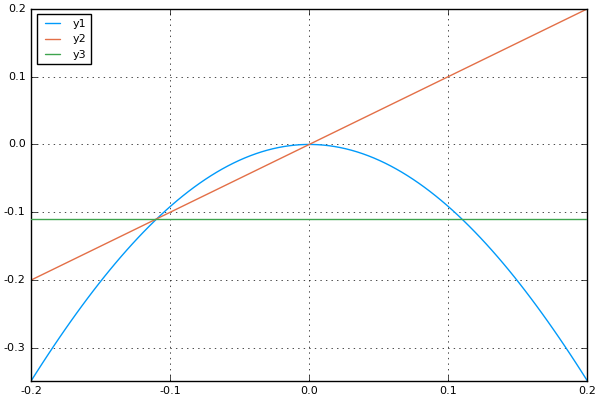

In [688]:
plot(x->f(f2(x,c),c),-0.2,0.2)
plot!(x->x,-0.2,0.2)
plot!(x->B,-0.2,0.2)

In [689]:
fB(x,c)=f3(x,c)-B

fB (generic function with 1 method)

In [690]:
b=0.1

0.1

In [691]:
B

-0.10964741825898341

In [692]:
c

-1.7548772

In [693]:
fB(-B,c)

-8.326672684688674e-17

In [694]:
g(0.1,c)

-1.8003213613210165

In [695]:
Newton(fB,g,b,200,c)

0.10964741825898297

In [696]:
B1=-B

0.10964741825898341

Por alguna razón mi método de Newton no funciona, pero como la función es simétrica alrededor del  $0$, etonces $Q_c^3(-\beta)=\beta$

Así, $\hat\beta=-\beta$


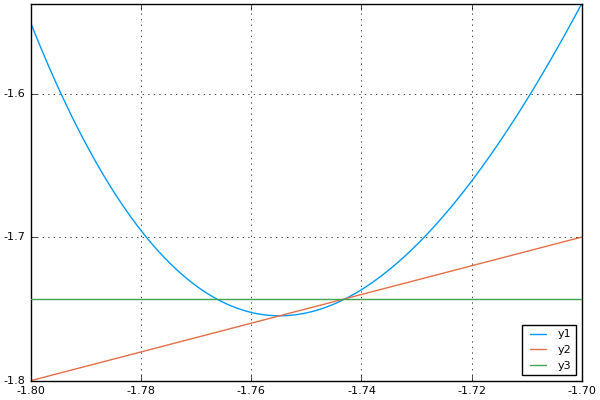

In [697]:
plot(x->f(f2(x,c),c),-1.8,-1.7)
plot!(x->x,-1.8,-1.7)
plot!(x->C,-1.8,-1.7)

In [698]:
fC(x,c)=f3(x,c)-C

fC (generic function with 1 method)

In [699]:
b=-1.77

-1.77

In [700]:
C1=Newton(fC,g,b,10,c)

-1.766452141344543

$\hat\gamma=-1.76645$


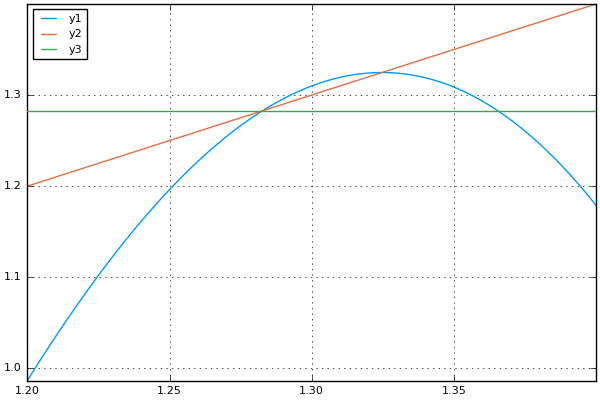

In [701]:
plot(x->f(f2(x,c),c),1.2,1.4)
plot!(x->x,1.2,1.4)
plot!(x->A,1.2,1.4)

In [702]:
fA(x,c)=f3(x,c)-A

fA (generic function with 1 method)

In [703]:
b=1.33

1.33

In [704]:
A1=Newton(fA,g,b,10,c)

1.3654759676607213

$\hat\alpha=1.3654$

¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

 $[\alpha,\hat\alpha]=[1.282,1.365]$,  $[\beta,\hat\beta]=[-0.109,0.109]$, $[\hat\gamma,\gamma]=[-1.766,-1.742]$

In [705]:
a=1.3
b=0.1
d=-1.745

-1.745

In [706]:
Iteraciones1=[]
for i in 0:10
    a=f(a,c)
    push!(Iteraciones1,a)
end

Iteraciones2=[]
for i in 0:10
    b=f(b,c)
    push!(Iteraciones2,b)
end


Iteraciones3=[]
for i in 0:10
    d=f(d,c)
    push!(Iteraciones3,d)
end



In [707]:
Iteraciones1

11-element Array{Any,1}:
 -0.0648772 
 -1.75067   
  1.30996   
 -0.0388774 
 -1.75337   
  1.31941   
 -0.0140232 
 -1.75468   
  1.32403   
 -0.00183068
 -1.75487   

In [708]:
Iteraciones2

11-element Array{Any,1}:
 -1.74488  
  1.28972  
 -0.0915015
 -1.7465   
  1.2954   
 -0.0768124
 -1.74898  
  1.30404  
 -0.0543477
 -1.75192  
  1.31436  

In [709]:
Iteraciones3

11-element Array{Any,1}:
  1.29015  
 -0.0903959
 -1.74671  
  1.2961   
 -0.0749918
 -1.74925  
  1.30501  
 -0.0518252
 -1.75219  
  1.3153   
 -0.0248702

Podemos ver que los puntos que están en los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$ caen casi instantáneamente en el ciclo periódico atractor. 

In [710]:
B

-0.10964741825898341

In [711]:
A

1.282665108959083

Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad importante de $Q_c(x)$ se utiliza aquí?



$I_0=[\hat\beta, \alpha]=[0.109,1.282]$
$I_1=[\gamma,\beta]=[-1.7428,-0.1096]$


In [712]:
print(f(B1,c)," ",f(A,c))

-1.7428546436691394 -0.1096474182589835

Podemos ver que que $Q_c(\hat\beta)=\beta$ y que $Q_c(\alpha)=\gamma$. Como la función es estrictamente decreciente en el intervalo$ [\hat\beta, \alpha]$, esto quiere decir que no sólo $Q_c(I_0) \supset I_1$ sino $Q_c(I_0) = I_1$


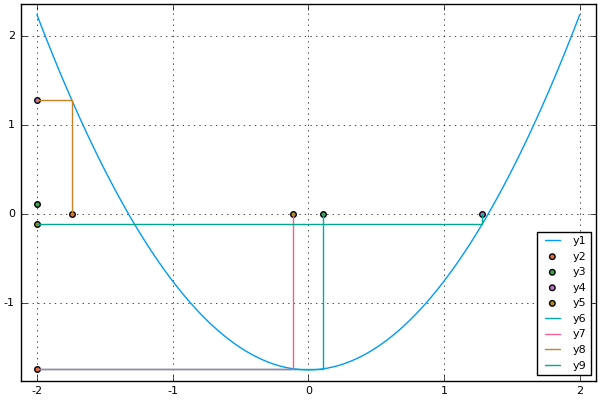

In [714]:
plot(x->f(x,c),-2,2)
scatter!([C,-2],[0,C])
scatter!([B1,-2],[0,B1])
scatter!([A,-2],[0,A])
scatter!([B,-2],[0,B])
plot!([B1,B1,-2],[0,f(B1,c),f(B1,c)])
plot!([B,B,-2],[0,f(B,c),f(B,c)])
plot!([C,C,-2],[0,f(C,c),f(C,c)])
plot!([A,A,-2],[0,f(A,c),f(A,c)])

En la gráfica también podemos ver que $Q_c(I_1) \supset I_0\cup I_1$